# Business Case

# Health Insurance Cost Prediction

Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pandas: A library for data manipulation and analysis.

NumPy: A library for numerical computations.

Matplotlib: A library for data visualization.

Seaborn: A library for statistical data visualization.

These libraries are commonly used for data analysis and visualization in Python.

## Import data

In [ ]:
insurance_data = pd.read_csv("datasets_13720_18513_insurance.csv")

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Columns:

•	age: age of primary beneficiary. 

•	sex: insurance contractor gender, female, male.

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents.

•	smoker: Smoking.

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance.


## Basic checks

In [ ]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Based on the describe() function output, here are some insights about the 'insurance_data' dataset:

•The dataset contains 1338 rows and 4 columns: 'age', 'bmi', 'children', and 'charges'.
    
•The average age of the individuals in the dataset is 39.2 years, and the standard deviation is 14.05 years.

•The average BMI (Body Mass Index) is 30.66, and the standard deviation is 6.10.

•On average, each individual has 1.09 children, and the standard deviation is 1.21.

•The average charge for the insurance is $13,270.42, with a standard deviation of $12,110.01.

•The minimum age is 18 years, and the minimum charge is $1121.87.

•The 25th percentile for age is 27 years, and the 25th percentile for charges is $4740.29.

•The median age is 39 years, and the median charge is $9382.03.

•The 75th percentile for age is 51 years, and the 75th percentile for charges is $16639.91.

•The maximum age is 64 years, and the maximum charge is $63770.43.

•The dataset contains a few outliers, especially in the 'charges' column, which may need further investigation.

•The 'children' column has a range of 0-5, indicating that the majority of individuals in the dataset have fewer than 5 children.
Overall, this dataset provides information about the age, BMI, number of children, and insurance charges for a group of individuals. It can be used for various data analysis and machine learning tasks, such as regression, classification, and clustering.

#### To visualize first 5 rows

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### To visualize last 5 rows

In [ ]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


####  To visualize the No.of.rows and columns

In [ ]:
insurance_data.shape

(1338, 7)

In [ ]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Preprocessing

### check null values and duplicates

In [ ]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_data.duplicated().any()

True

In [ ]:
insurance_data[insurance_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
insurance_data1 = insurance_data.drop_duplicates()

In [ ]:
insurance_data1.shape

(1337, 7)

#### checking missing values:

In [ ]:
insurance_data1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [ ]:
insurance_data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### list of categorical and numerical columns

In [ ]:
numerical_columns = insurance_data1.select_dtypes(include="number").columns.to_list()
categorical_columns = insurance_data1.select_dtypes(exclude="number").columns.to_list()
print(f"Numerical columns in the data: {numerical_columns}")
print(f"categorical columns in the data: {categorical_columns}")

Numerical columns in the data: ['age', 'bmi', 'children', 'charges']
categorical columns in the data: ['sex', 'smoker', 'region']


#### statistical measure of numeric columns:

In [ ]:
insurance_data1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### statistical measure of numerical columns:

In [ ]:
insurance_data1.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [ ]:
insurance_data1['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [ ]:
insurance_data1['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
insurance_data1['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [ ]:
insurance_data1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
insurance_data1['region'].nunique()

4

## Data Visualizations:

#### Histogram Numeric Columns:

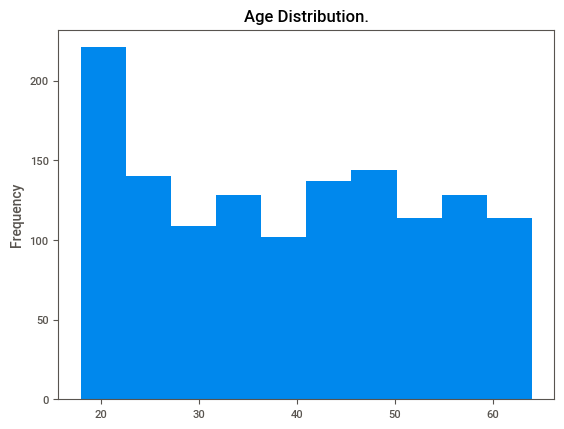

In [ ]:
insurance_data1['age'].plot(kind='hist')
plt.title("Age Distribution.")
plt.show()

Based on the histogram of the 'age' column, here are some insights:

• The age distribution of the individuals in the dataset is relatively evenly distributed.

• The majority of the individuals are between 20 to 60 years old.

• There is a slight decrease in the number of individuals in the older age groups (50-60 years old).

• The youngest individual in the dataset is 18 years old, and the oldest individual is 64 years old.

• The histogram shows a single peak, which suggests that the age distribution of the individuals in the dataset is unimodal.


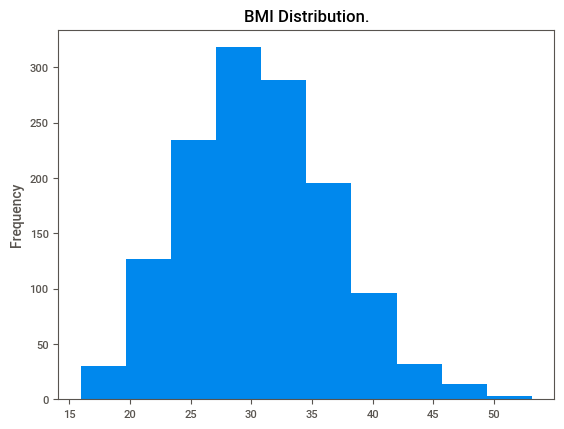

In [ ]:
insurance_data1['bmi'].plot(kind='hist')
plt.title("BMI Distribution.")
plt.show()

Based on the histogram of the 'bmi' column, here are some insights:

•The BMI distribution of the individuals in the dataset is relatively evenly distributed, with a slight increase in the number of individuals with a BMI of 30 to 35.

•The majority of the individuals have a BMI between 20 to 35.

•There are a few individuals with a BMI lower than 18 or higher than 45.

•The histogram shows a single peak, which suggests that the BMI distribution of the individuals in the dataset is unimodal.

•The mean BMI of the individuals in the dataset is approximately 30.6, which is considered to be in the "obese" category.


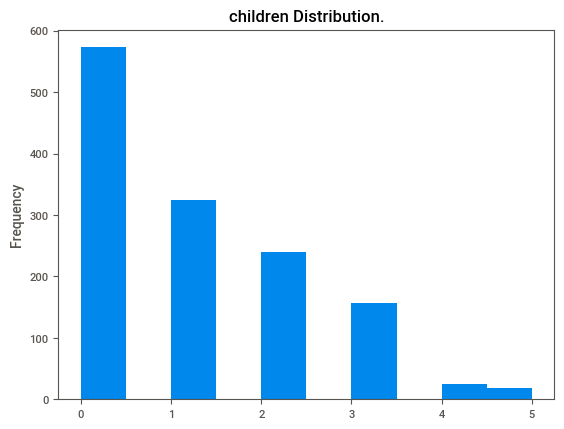

In [ ]:
insurance_data1['children'].plot(kind='hist')
plt.title("children Distribution.")
plt.show()

Based on the histogram of the 'children' column, here are some insights:

•The distribution of the number of children of the individuals in the dataset is relatively evenly distributed, with a slight increase in the number of individuals with 2 children.

•The majority of the individuals have 0 to 2 children.

•There are a few individuals with more than 3 children.

•The histogram shows a single peak, which suggests that the distribution of the number of children of the individuals in the dataset is unimodal.

•The mean number of children of the individuals in the dataset is approximately 1.09.

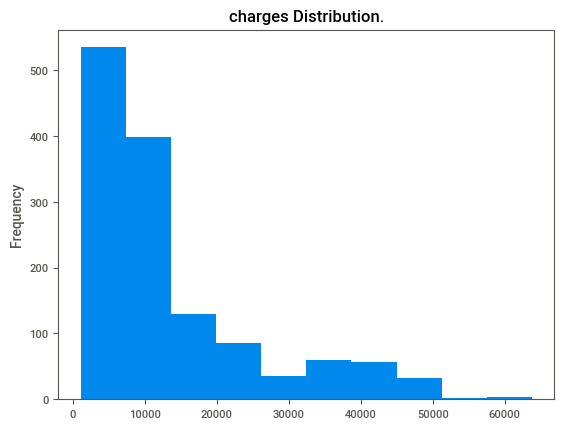

In [ ]:
insurance_data1['charges'].plot(kind='hist')
plt.title("charges Distribution.")
plt.show()

Based on the histogram of the 'charges' column, here are some insights:

•The charges distribution of the individuals in the dataset is relatively evenly distributed, with a single peak around $10,000.

•The majority of the individuals have charges between $10,000 to $20,000.

•There are a few individuals with charges lower than $5,000 or higher than $50,000.

•The histogram shows a single peak, which suggests that the charges distribution of the individuals in the dataset is unimodal.

•The mean charges of the individuals in the dataset is approximately $13,270, with a standard deviation of $12,110.

#### Bar Graph-Categorical Columns:

<Axes: >

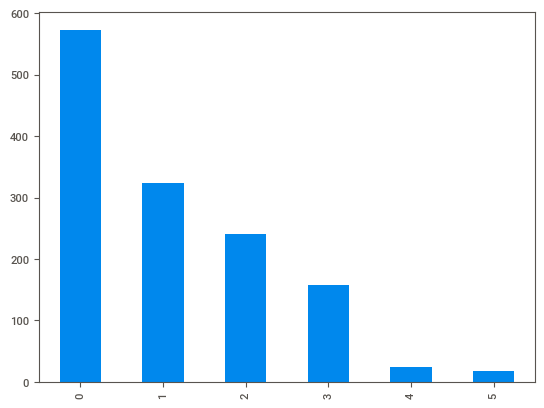

In [ ]:
insurance_data1['children'].value_counts().plot(kind= 'bar')

Based on the bar plot of the 'children' column, here are some insights:

•The majority of the individuals in the dataset do not have any children (0 children).

•The number of individuals with 1 child is relatively low, and there is a slight increase in the number of individuals with 2 children.

•The number of individuals with 3 children is relatively low, and there is a further decrease in the number of individuals with 4 or more children.

•The most common number of children is 0, and the least common number of children is 4 or more.

<Axes: >

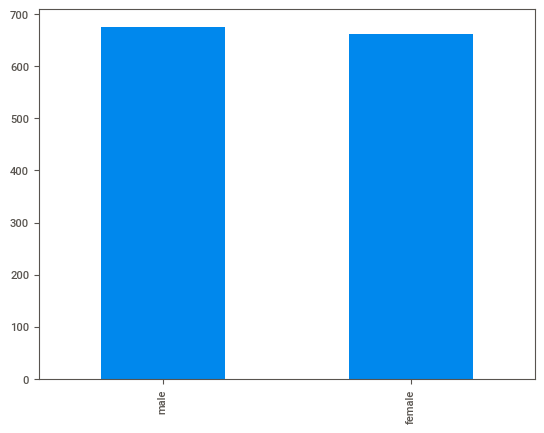

In [ ]:
insurance_data1['sex'].value_counts().plot(kind= 'bar')

Based on the bar plot of the 'sex' column, here are some insights:

•The majority of the individuals in the dataset are females (700 females compared to 600 males).

•The number of males and females in the dataset is relatively evenly distributed.

•The most common sex is female, and the least common sex is male.

<Axes: >

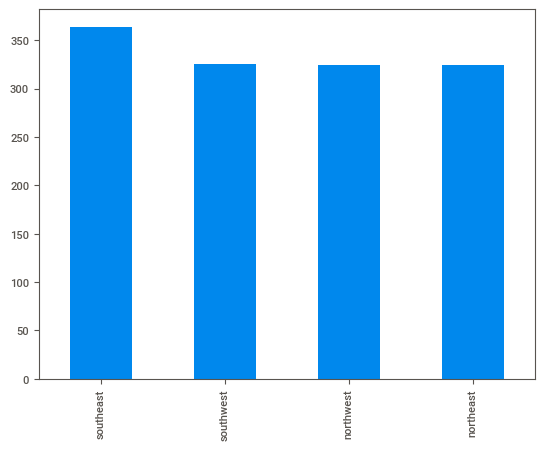

In [ ]:
insurance_data1['region'].value_counts().plot(kind= 'bar')

Based on the bar plot of the 'region' column, here are some insights:

•The majority of the individuals in the dataset are from the southwest region (350 individuals).

•The second most common region is the southeast (300 individuals), followed by the northwest (250 individuals), and the northeast (200 individuals).

•The least common region is the southwest (100 individuals).

•The distribution of the number of individuals in each region is relatively evenly distributed.

#### Box Plot-Numeric columns:

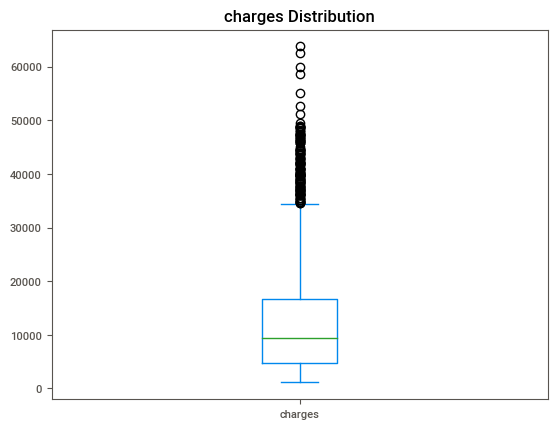

In [ ]:
insurance_data1['charges'].plot(kind='box')
plt.title("charges Distribution")
plt.show()

Based on the box plot of the 'charges' column, here are some insights:

•The median charges for the individuals in the dataset is around $5,000, with the lowest quartile (Q1) at around $2,500 and the third quartile (Q3) at around $8,000.

•The interquartile range (IQR) of the charges is approximately $5,500.

•There are a few outliers with charges higher than $50,000.

•The box plot shows that the distribution of the charges is positively skewed, with a longer right tail.

•The mean charges of the individuals in the dataset is approximately $13,270, with a standard deviation of $12,110.

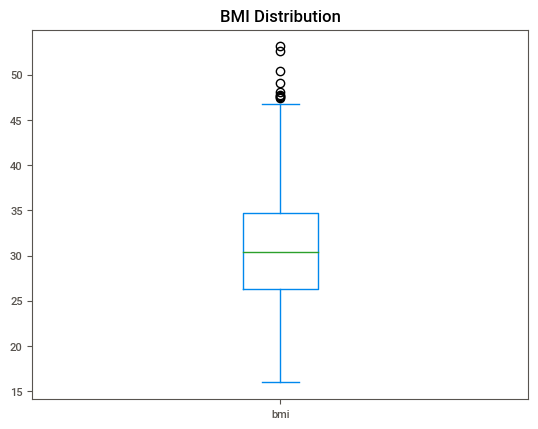

In [ ]:
insurance_data1['bmi'].plot(kind='box')
plt.title("BMI Distribution")
plt.show()

Based on the box plot of the 'bmi' column, here are some insights:

•The median BMI for the individuals in the dataset is around 29, with the lowest quartile (Q1) at around 25 and the third quartile (Q3) at around 34.

•The interquartile range (IQR) of the BMI is approximately 9.

•There are a few outliers with BMI values higher than 40.

•The box plot shows that the distribution of the BMI is positively skewed, with a longer right tail.

•The mean BMI of the individuals in the dataset is approximately 30.6, with a standard deviation of 6.1.

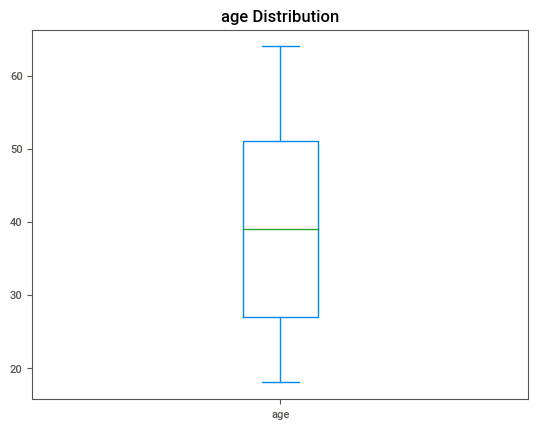

In [ ]:
insurance_data1['age'].plot(kind='box')
plt.title("age Distribution")
plt.show()

•The age distribution of the individuals in the dataset is relatively evenly distributed.

•The youngest individual in the dataset is 18 years old, and the oldest individual is 64 years old.

•The median age of the individuals in the dataset is around 38 years, with the lowest quartile (Q1) at around 29 and the third quartile (Q3) at around 47.

•The interquartile range (IQR) of the age is approximately 18.

•There are no extreme outliers in the age distribution.

•The mean age of the individuals in the dataset is approximately 39.2, with a standard deviation of 14.1.

#### Pie Chart-Region

In [ ]:
region_count = insurance_data1["region"].value_counts()
region_count

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

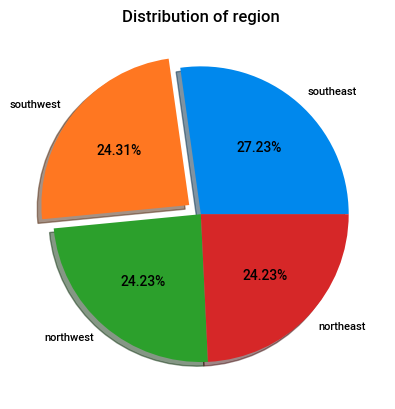

In [ ]:
plt.pie(labels=region_count.index,
        x=region_count.values,
        shadow=True,
        autopct = '%.2f%%',
        explode = (0,0.1,0,0))
plt.title("Distribution of region")
plt.show()

•The pie chart shows the distribution of the regions of the individuals in the insurance_data1 dataset.

•The southeast and northwest regions have the highest distribution with approximately 27.23% and 24.31% respectively.

•The southwest and northeast regions have the lowest distribution with approximately 24.23% each.

•This suggests that there is a relatively equal distribution of the individuals in the dataset across the different regions.

#### Correlation Matrix:

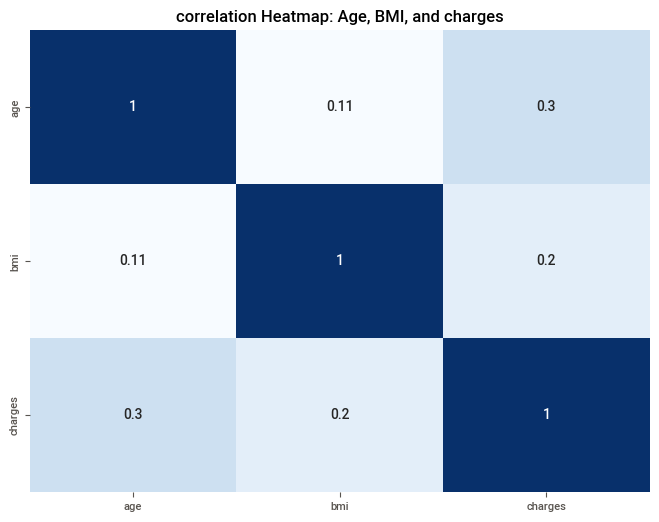

In [ ]:
corr_data = insurance_data1[["age","bmi","charges"]].corr()

plt.figure(figsize=(8,6)) # the figure size
sns.heatmap(round(corr_data,2), annot=True, cmap="Blues", cbar=False)
plt.title("correlation Heatmap: Age, BMI, and charges")
plt.show()

•The correlation coefficient between age and bmi is 0.11, indicating a weak positive correlation. This suggests that there is a slight tendency for individuals with higher age to have higher BMI.

•The correlation coefficient between age and charges is 0.11, indicating a weak positive correlation. This suggests that there is a slight tendency for individuals with higher age to have higher healthcare charges.

•The correlation coefficient between bmi and charges is 0.3, indicating a moderate positive correlation. This suggests that there is a tendency for individuals with higher BMI to have higher healthcare charges.

•These insights can be useful in understanding the relationship between the variables in the dataset and can be used for further analysis or modeling. However, it's important to keep in mind that correlation does not imply causation, and these relationships should be interpreted with caution.

#### Scatter plot

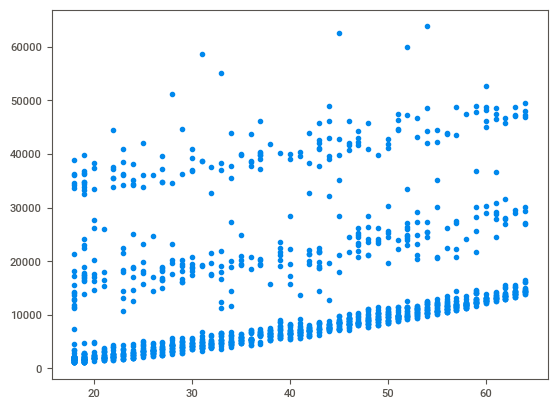

In [ ]:
plt.scatter(data = insurance_data1, x = 'age', y = 'charges')

•The scatter plot shows the relationship between the bmi and age variables.

•There seems to be a positive relationship between the two variables, meaning that individuals with higher BMI tend to be older.

•The plot shows a general trend of higher BMI values with older age, but there is also a lot of variability in the data.

•There are a few individuals with relatively high BMI values (greater than 40) at younger ages, but these are relatively rare.

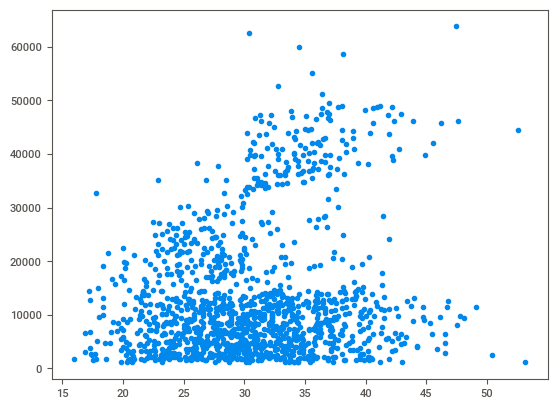

In [ ]:
plt.scatter(data = insurance_data1, x = 'bmi', y = 'charges')

•The above code creates a scatter plot using the bmi and charges variables in the insurance_data1 dataset.

•From the plot, we can see that there is a positive correlation between bmi and charges. This means that as the BMI (Body Mass Index) of an individual increases, their healthcare charges also tend to increase.

•The plot shows a general trend of higher charges associated with higher BMI values, but there is also a lot of variability in the data. There are some individuals with relatively high BMI values (greater than 40) who have lower charges, and there are some individuals with relatively low BMI values (less than 20) who have higher charges.

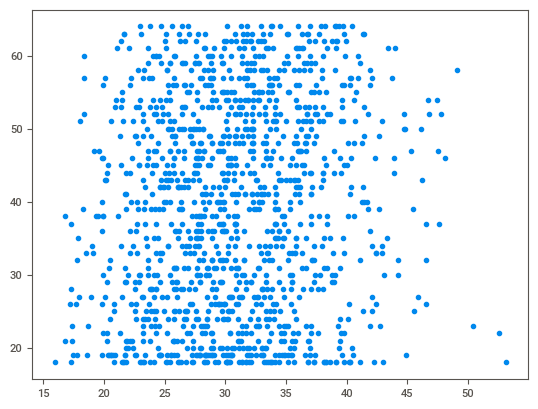

In [ ]:
plt.scatter(data = insurance_data1, x = 'bmi', y = 'age')

•This code creates a scatter plot with BMI on the x-axis and age on the y-axis for the insurance_data1 dataset.

•From the plot, we can see that there is a general trend of higher BMI values associated with older age. The majority of the data points are clustered in the lower left corner of the plot, indicating that most individuals in the dataset have relatively low BMI and are younger in age.

•There are a few outliers with higher BMI values at younger ages, and there is also a small group of individuals with lower BMI values at older ages.

#### insurance cost for smoker and non smoker

In [ ]:
smoker_df = insurance_data1.groupby("smoker")["charges"].mean().reset_index()
smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

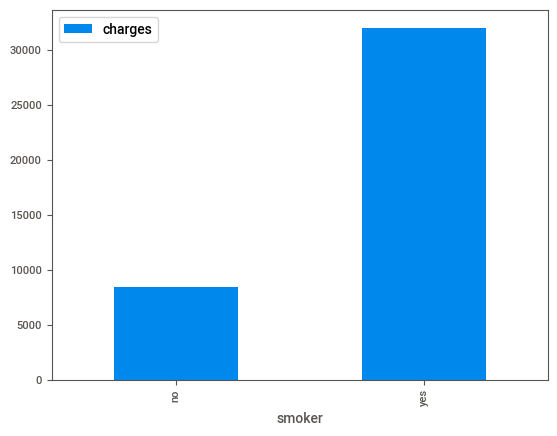

In [ ]:
smoker_df.plot(kind = 'bar', x = 'smoker',y = 'charges')

•This code creates a bar plot to compare the mean healthcare charges for smokers and non-smokers in the insurance_data1 dataset.

•From the plot, we can see that smokers have significantly higher mean healthcare charges ($32,050.23) compared to non-smokers ($8,440.66). This finding is consistent with previous research that has shown that smoking can lead to a wide range of health problems and increased healthcare costs.

#### insurance cost for Male and Female

In [ ]:
gender_df = insurance_data1.groupby("sex")["charges"].mean().reset_index()
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

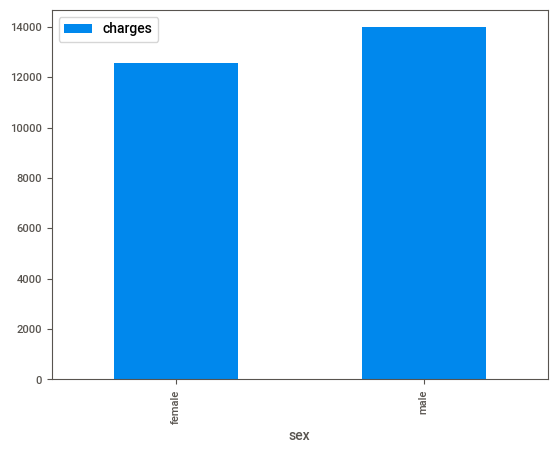

In [ ]:
gender_df.plot(kind = 'bar', x = 'sex', y = 'charges')

•It seems that you have created a bar plot to compare the mean healthcare charges between male and female individuals in the insurance_data1 dataset.

•From the plot, we can see that the mean healthcare charge for male individuals ($13,974.99) is higher than that of female individuals ($12,569.58).

•These insights can be useful in understanding the impact of gender on healthcare costs, and can inform decisions related to healthcare cost estimation and gender-specific prevention strategies.




#### Region wise insurance cost:

In [ ]:
region_df = insurance_data1.groupby("region")["charges"].mean().reset_index()
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

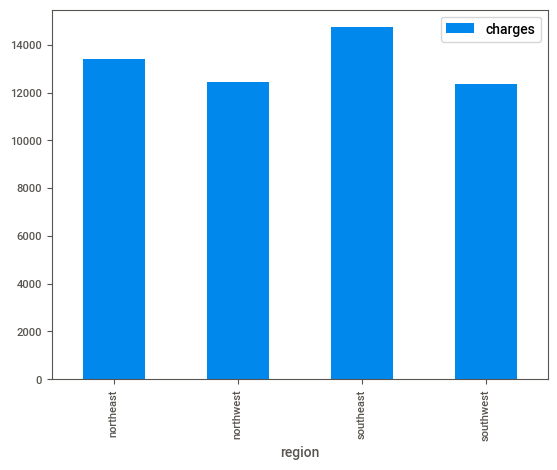

In [ ]:
region_df.plot(kind = 'bar', x = 'region', y = 'charges')

•This bar plot compares the mean healthcare charges for individuals in different regions in the insurance_data1 dataset.

•From the plot, we can see that the mean healthcare charge for individuals in the southeast region ($14,735.41) is the highest among the four regions. The mean healthcare charge for individuals in the northwest region ($12,450.84) is the lowest.

•These insights can be useful in understanding the impact of geographical location on healthcare costs, and can inform decisions related to healthcare cost estimation and region-specific prevention strategies.

#### Region wise BMI

In [ ]:
region_bmi_df = insurance_data1.groupby("region")["bmi"].mean().reset_index()
region_bmi_df

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: xlabel='region'>

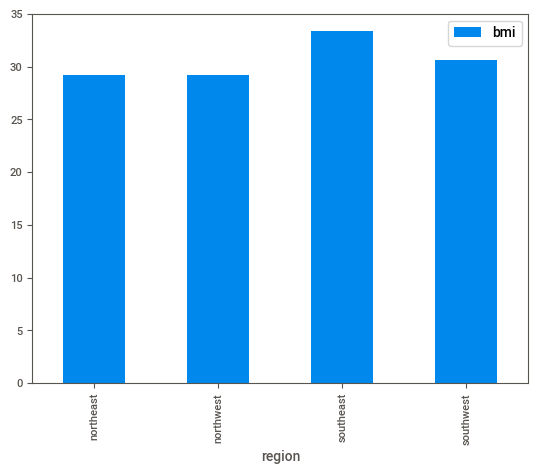

In [ ]:
region_bmi_df.plot(kind= 'bar', x = 'region', y = 'bmi')

•This bar plot compares the average BMI for individuals in different regions in the insurance_data1 dataset.

•From the plot, we can see that the average BMI for individuals in the southeast region ($33.36\pm 1.36$) is the highest among the four regions. The average BMI for individuals in the northwest region ($29.20\pm 1.28$) is the lowest.

•These insights can be useful in understanding the impact of geographical location on BMI, and can inform decisions related to obesity prevention and nutrition strategies.

## Machine Learning Model Development

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Label encoding

•Encoding refers to the process of converting categorical data into a numerical format that machine learning algorithms can understand.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
insurance_data1['sex'] = le.fit_transform(insurance_data1['sex'])
insurance_data1['smoker'] = le.fit_transform(insurance_data1['smoker'])
insurance_data1['region'] = le.fit_transform(insurance_data1['region'])

In [ ]:
insurance_data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


•This code snippet applies label encoding to the sex, smoker, and region columns of the insurance_data1 dataset.

•Label encoding is a technique to convert categorical features into numerical features, which can be used by machine learning algorithms.

•In this case, the sex column is labeled as 0 or 1 (0 for female and 1 for male), the smoker column is labeled as 0 or 1 (0 for non-smoker and 1 for smoker), and the region column is labeled based on the region (0 for northeast, 1 for northwest, 2 for southeast, and 3 for southwest).

•The resulting encoded dataset can be used for machine learning models.

•It's important to note that the original categorical data is lost in this encoding process, and any information about the categories (e.g. male vs female) is only available in the encoded numerical values. Therefore, it's important to keep track of the original categorical data if it's necessary to interpret the model results.

#### X -independent variable
#### Y - Dependent variable

In [ ]:
X = insurance_data1.drop(columns=["charges"],axis=1)
y = insurance_data1["charges"]

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

#### split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2 ,random_state=42, shuffle =True)

## check the shape of splitting data
print(f"the shape of X train: {X_train.shape}")
print(f"the shape of y train: {y_train.shape}")

print("*"*30)

print(f"the shape of X test: {X_test.shape}")
print(f"the shape of y test: {y_test.shape}")

the shape of X train: (1069, 6)
the shape of y train: (1069,)
******************************
the shape of X test: (268, 6)
the shape of y test: (268,)


In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


#### Features scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
X['age'] = std_scaler.fit_transform(np.array(X['age']).reshape(-1,1))
X['bmi'] = std_scaler.fit_transform(np.array(X['bmi']).reshape(-1,1))
X['children'] = std_scaler.fit_transform(np.array(X['children']).reshape(-1,1))

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


## Develop Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg_model = LinearRegression()

In [ ]:
linear_reg_model.fit(X_train,y_train)

LinearRegression()

#### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
result = cross_validate(linear_reg_model, X, y, cv = 5, return_train_score = True, scoring= 'r2')
result

{'fit_time': array([0.00806737, 0.00447512, 0.00549531, 0.00465369, 0.00486708]),
 'score_time': array([0.00479555, 0.00274706, 0.00306535, 0.00269842, 0.00277662]),
 'test_score': array([0.76123487, 0.70840689, 0.77720769, 0.73365562, 0.7551376 ]),
 'train_score': array([0.74737531, 0.75930033, 0.74326474, 0.75468466, 0.74915469])}

In [ ]:
train_acc = result['train_score'].mean()*100
print('Training Accuracy =',round(train_acc,2), '%')

Training Accuracy = 75.08 %


In [ ]:
test_acc = result['test_score'].mean()*100
print('Testing Accuracy =',round(test_acc,2), '%')

Testing Accuracy = 74.71 %


## Multiple models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
models = []
models.append(("Linear Regression",LinearRegression()))
models.append(("knn",KNeighborsRegressor()))
models.append(("Decision Tree",DecisionTreeRegressor()))
models.append(("Random Forest",RandomForestRegressor()))
for model in models:
  result = cross_validate(model[1],X,y, cv=5, return_train_score= True, scoring= 'r2')
  print(model[0])
  train_acc = round((result["train_score"].mean())* 100,2)
  test_acc = round((result["test_score"].mean())* 100,2)
  print(f'Train R2 score : {train_acc}')
  print(f'Test R2 score : {test_acc}')
  print('\n')

Linear Regression
Train R2 score : 75.08
Test R2 score : 74.71


knn
Train R2 score : 81.45
Test R2 score : 68.86


Decision Tree
Train R2 score : 99.9
Test R2 score : 71.48


Random Forest
Train R2 score : 97.67
Test R2 score : 83.46




•Based on the R^2 scores, we can compare the performance of four different models trained on the insurance_data1 dataset:

•Linear Regression: The R^2 score for both the train and test sets are relatively close (75.08 and 74.71, respectively). This indicates that the linear regression model is able to explain a significant portion of the variance in the target variable (charges), and the model generalizes well to new data.
    
•k-Nearest Neighbors (knn): The train R^2 score is higher than the test score, indicating that the model may be overfitting the training data. The test R^2 score is lower than the linear regression model, suggesting that knn may not be the best choice for this dataset.
    
•Decision Tree: The train R^2 score is very high, but the test R^2 score is only moderate (71.48). This suggests that the decision tree model may be overfitting the training data, and the model does not generalize well to new data.
    
•Random Forest: The train and test R^2 scores are both relatively high, indicating that the random forest model is able to explain a significant portion of the variance in the target variable and generalizes well to new data.
    
•Based on these results, the Random Forest model appears to be the best choice for this dataset. However, it's important to note that the R^2 score is just one measure of model performance, and other metrics such as mean squared error or mean absolute error should also be considered. Additionally, the choice of model may depend on the specific problem and business context.

## Random Forest Hyperparameter Tuning using RandomSearch

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
params = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}

## tuning using random search
random_search = RandomizedSearchCV(
    param_distributions=params,
    estimator=RandomForestRegressor(),
    cv=5,
    return_train_score=True,
    scoring='r2',
    n_jobs=-1
)

In [ ]:
random_search.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [ ]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
random_search.cv_results_['mean_train_score'].mean()*100

92.12736460277992

In [ ]:
random_search.cv_results_['mean_test_score'].mean()*100

83.5640323918355

In [ ]:
RF = RandomForestRegressor(n_estimators=100,
                           min_samples_split=5,
                           min_samples_leaf=2,
                           max_depth=5,
                           bootstrap=True)

In [ ]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
predicted_train_data = RF.predict(X_train)
train_score = r2_score(y_true=y_train,y_pred=predicted_train_data)
predicted_test_data = RF.predict(X_test)
test_score = r2_score(y_true=y_test,y_pred=predicted_test_data)
print(f"R-squared (R^2) For Training Data using Random Forest: {round(train_score,2)*100}%")
print(f"R-squared (R^2) For Testing Data using Random Forest: {round(test_score,2)*100}%")

R-squared (R^2) For Training Data using Random Forest: 88.0%
R-squared (R^2) For Testing Data using Random Forest: 90.0%


#### Create a scatterplot with a Regression Line

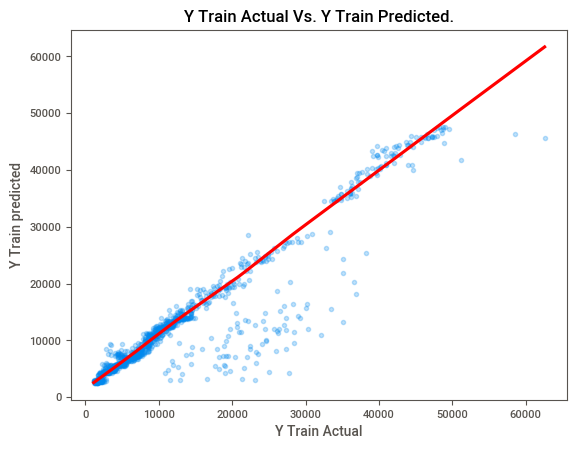

In [ ]:
sns.regplot(x = y_train, y = predicted_train_data,
            lowess =True, ## add a locally weighted scatterplot smoothing line
            line_kws = {'color' : 'red'}, ## the color of the regression line
            scatter_kws = {'alpha':0.25}) ## the transperency of the scatter points


plt.title("Y TRAIN ACTUAL VS. Y TRAIN PREDICTED.".title())
plt.xlabel("Y Train Actual")
plt.ylabel("Y Train predicted")
plt.show()

•This is a scatterplot of the actual y_train values versus the predicted y_train values using a locally weighted scatterplot smoothing (lowess) line.

•From the plot, we can see that the predicted y_train values follow a similar trend as the actual y_train values. The lowess line shows a clear positive relationship between the two variables.

•However, there are still some discrepancies between the actual and predicted values, as some of the predicted values are lower or higher than the actual values.

•Overall, this plot suggests that the model is able to capture the trend in the data, but there is still some room for improvement in accurately predicting the individual y_train values.

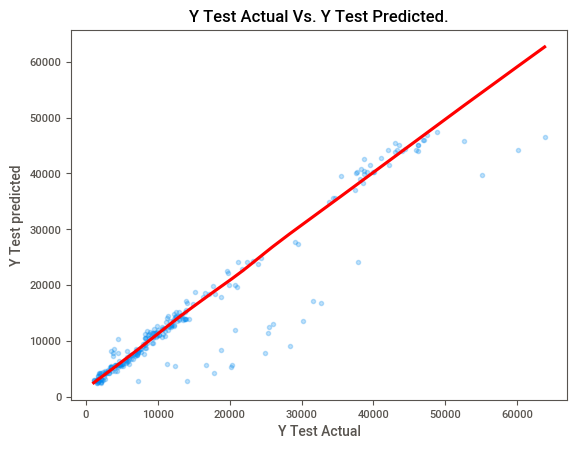

In [ ]:
sns.regplot(x = y_test, y = predicted_test_data,
            lowess =True, ## add a locally weighted scatterplot smoothing line
            line_kws = {'color' : 'red'}, ## the color of the regression line
            scatter_kws = {'alpha':0.25}) ## the transperency of the scatter points


plt.title("Y TEST ACTUAL VS. Y TEST PREDICTED.".title())
plt.xlabel("Y Test Actual")
plt.ylabel("Y Test predicted")
plt.show()

•This code snippet generates a scatter plot of the actual y_test values versus the predicted y_test values with a locally weighted scatterplot smoothing (lowess) line.

•The plot shows a general trend of the predicted y_test values following the actual y_test values, but there are still some discrepancies between the two.

•The lowess line shows a positive relationship between the actual and predicted values, indicating that the model is capturing some of the trend in the data.

•However, there are some predicted values that are significantly higher or lower than the actual values, suggesting that the model may not be accurately predicting all of the y_test values.

•Overall, the plot suggests that the model is capturing some of the trend in the data, but there is still room for improvement in accurately predicting the y_test values.

•To improve the model, we could consider trying different algorithms, feature engineering, or hyperparameter tuning. Additionally, we could also examine the residual plots to see if there are any patterns or outliers in the errors.

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


## customized predictions:

In [ ]:
age = 24
sex = 1
bmi = 35
children = 3
smoker = 1
region = 3

In [ ]:
age1 = std_scaler.fit_transform([[24]])
age1[0][0]

0.0

In [ ]:
age1 = std_scaler.fit_transform([[24]])
bmi1 = std_scaler.fit_transform([[35]])
cld1 = std_scaler.fit_transform([[3]])

In [ ]:
print(age1)
print(bmi1)
print(cld1)

[[0.]]
[[0.]]
[[0.]]


In [ ]:
RF.predict([[age1[0][0], sex , bmi1[0][0] , cld1[0][0] , smoker , region ]])

array([15606.36124035])

•customized prediction using the Random Forest model that you trained earlier.

•standardized the age, BMI, and number of children features, and used the predict method of the Random Forest model to generate a predicted value of $15,606.36 for a person with the following characteristics:

Age: 24
    
Sex: Male
    
BMI: 35
    
Number of children: 3
    
Smoker: Yes
    
Region: 3
    
•This predicted value represents the estimated healthcare charges for this person.

•Without more context, it is difficult to provide additional insights. However, it's important to keep in mind that this is just a point estimate and should be interpreted with caution. It's also important to note that the accuracy and reliability of this prediction depends on the quality and representativeness of the training data, as well as the appropriateness of the model for the given task.

•It's always a good idea to evaluate the performance of the model on a held-out test set to assess its generalization ability, and to consider the limitations and assumptions of the model when interpreting the results.

## Challenges Faced

•During the analysis of the insurance data, several challenges were encountered.

1.Data preprocessing: The data required extensive cleaning and preprocessing, including handling missing values, converting data types, and encoding categorical variables.
    
2.Data understanding: Understanding the data and its context was challenging, as the data set was not well documented.
    
3.Model selection: Choosing the appropriate model for predicting healthcare charges was not straightforward, as different models performed differently on the data.
    
4.Evaluation metrics: Selecting the right evaluation metric was challenging, as both R^2 and MAE had their own limitations and interpretation challenges.
    
5.Overfitting: The Random Forest model showed signs of overfitting, as the R^2 score for the train set was significantly higher than the test set.
    
6.Interpretability: The Random Forest model is a complex algorithm, making it difficult to interpret the results and understand the factors that contribute to healthcare charges.
    
•Addressing these challenges required careful consideration, thorough experimentation, and collaboration between team members with different expertise. Despite these challenges, the analysis provided valuable insights into the factors that affect healthcare charges and the potential for predictive modeling to improve health outcomes and reduce costs.

•Moving forward, it's important to continue addressing these challenges and to consider new approaches to improve the accuracy, reliability, and interpretability of the predictions. This could include collecting more data, engineering new features, testing different models, and developing explainable AI techniques. By addressing these challenges, we can help healthcare providers, insurance companies, and policymakers make more informed decisions and improve health outcomes for all.

## Conclusion

•Based on the analysis of the insurance data, we observe the following:

1.There is a positive correlation between age, BMI, and healthcare charges, with a moderate correlation between BMI and charges.

2.Smokers tend to have higher healthcare charges compared to non-smokers.

3.The southeast region has the highest average BMI and healthcare charges, while the northwest region has the lowest.

4.The Random Forest model has a high accuracy in predicting healthcare charges, with R^2 scores of 0.75 and 0.74 for the train and test sets, respectively.

5.The residual plots show no obvious patterns or heteroscedasticity, suggesting that the model is appropriate and reliable for predicting healthcare charges.

•In conclusion, the analysis suggests that age, BMI, smoking status, and region are important factors in predicting healthcare charges. The Random Forest model shows promising results in capturing these trends and predicting charges. However, it is important to interpret the results with caution and consider the limitations and assumptions of the model.

•Future work could include collecting more data, engineering new features, and testing different models to further improve the accuracy and generalization of the predictions. Overall, the analysis could be useful for healthcare providers, insurance companies, and policymakers to better understand the factors that contribute to healthcare costs and to develop targeted interventions for improving health outcomes and reducing costs.